Odwiedzi nas czy wystawi?

--Prognozowanie czy rezerwacja zostanie wykorzystana czy anulowana

--Aplikacja do szacowania obłożenia hotelu na podstawie zbioru rezerwacji

(--kiedy jest najlepsza pora roku na rezerwację pokoju hotelowego

--optymalna długość pobytu, aby uzyskać najlepszą stawkę dzienną

--czy hotel otrzyma nieproporcjonalnie dużą liczbę specjalnych próśb)

1)H1 = Resort Hotel, H2 = City Hotel

2)Value indicating if the booking was canceled (1) or not (0)

3)Ilość dni, które upłynęły między datą wpisania rezerwacji do PMS a datą przyjazdu

4)Year of arrival date

5)Month of arrival date

6)Week number of year for arrival date

7)Day of arrival date

8)Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

9)Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

10)Number of adults

11)Number of children

12)Number of babies

13)Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no mea

14)Country of origin. Categories are represented in the ISO 3155–3:2013 format

15)Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

16)Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

17)Value indicating if the booking name was from a repeated guest (1) or not (0)

18)Number of previous bookings that were cancelled by the customer prior to the current booking

19)Number of previous bookings not cancelled by the customer prior to the current booking

20)Code of room type reserved. Code is presented instead of designation for anonymity reasons.

21)Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due

22)Number of changes/amendments made to the booking from the moment the booking was entered on the PMS

23)Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit

24)ID of the travel agency that made the booking

25)ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

26)Number of days the booking was in the waiting list before it was confirmed to the customer

27)Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it;

28)Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

29)Number of car parking spaces required by the customer

30)Number of special requests made by the customer (e.g. twin bed or high floor)

31)Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked

32)Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was 

https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns


tabela_glowna = pd.read_csv('hotel_bookings_dane.csv')
tabela_glowna
# tabela_glowna.isna().any()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [2]:
#średnia lead_time, podział na tych którzy rezerwują z małym wyprzedzeniem i dużym wyprzedzeniem, wyliczone w karzdej kategorii ile jest
# i nieodwolanych rezerwacji i sdosunek do wszystkich rezewacji z danej kategorii

lead_time = tabela_glowna['lead_time']
srednia_lead_time = lead_time.mean()

krotki_czas = tabela_glowna[tabela_glowna['lead_time'] < srednia_lead_time]
krotki_czas

dlugi_czas = tabela_glowna[tabela_glowna['lead_time'] > srednia_lead_time]
dlugi_czas

krotki_czas_calosc = krotki_czas['is_canceled'].count()
krotki_czas_odwolane = krotki_czas['is_canceled'].value_counts()[1]
krotki_czas_nieodwolane = krotki_czas['is_canceled'].value_counts()[0]
dlugi_czas_calosc = dlugi_czas['is_canceled'].count()
dlugi_czas_odwolane = dlugi_czas['is_canceled'].value_counts()[1]
dlugi_czas_nieodwolane = dlugi_czas['is_canceled'].value_counts()[0]

# print(krotki_czas_calosc)
# print(krotki_czas_nieodwolane)
# print(krotki_czas_odwolane)
# print(dlugi_czas_calosc)
# print(dlugi_czas_nieodwolane)
# print(dlugi_czas_odwolane)

# % nioedwolanych rezerwacji wsrpd tych które zostały złozone z niewilkiem wyprzedzeniem
print(round((krotki_czas_nieodwolane/krotki_czas_calosc)*100, 2))
# % odwolanych rezerwacji wsrpd tych które zostały złozone z niewilkiem wyprzedzeniem
print(round((krotki_czas_odwolane/krotki_czas_calosc)*100, 2))
# % nieodwolanych rezerwacji wsrpd tych które zostały złozone z dużym wyprzedzeniem
print(round((dlugi_czas_nieodwolane/dlugi_czas_calosc)*100, 2))
# % odwolanych rezerwacji wsrpd tych które zostały złozone z dużym wyprzedzeniem
print(round((dlugi_czas_odwolane/dlugi_czas_calosc)*100, 2))



71.75
28.25
48.81
51.19


In [3]:
tabela_wiek = tabela_glowna[['is_canceled', 'adults', 'children', 'babies']].fillna(0.0)
tabela_wiek
tabela_wiek.isna().any()

#ogółem
tabela_wiek.groupby(by=['is_canceled', 'adults', 'children', 'babies']).count()
# odwolane
tabela_wiek['is_canceled'].value_counts()[1]
tabela_wiek[tabela_wiek['is_canceled']==1]
#nieodwolane
tabela_wiek['is_canceled'].value_counts()[0]
tabela_wiek[tabela_wiek['is_canceled']==0]

,is_canceled,adults,children,babies
0,0,2,0.0,0
1,0,2,0.0,0
2,0,1,0.0,0
3,0,1,0.0,0
4,0,2,0.0,0
...,...,...,...,...
119385,0,2,0.0,0
119386,0,3,0.0,0
119387,0,2,0.0,0
119388,0,2,0.0,0


In [4]:
#dorosli bez dzieci
dorosli = tabela_wiek[(tabela_wiek['adults']!=0) & (tabela_wiek['children']==0) & (tabela_wiek['babies']==0)]
dorosli
dorosli[['is_canceled','adults']].groupby(by=['is_canceled','adults']).count() #z tego widac ze powyzej 4 dorołych jest zawsze anulowne

# wykresy patrz projekt 2


#liczba wszystkich rezerwacji gdzie wystepowali dorosli
dorosli_calosc = dorosli['is_canceled'].count()
#liczba rezerwacji w ktorych wystepowali dorosli ktore zostaly odwolane
dorosli_odwolane = dorosli[dorosli['is_canceled'] == 1]
dorosli_odwolane['is_canceled'].count()
#liczba rezerwacji w ktorych wystepowali dorosli ktore niezostaly odwolane
dorosli_nieodwolane = dorosli[dorosli['is_canceled'] == 0]
dorosli_nieodwolane['is_canceled'].count()
#liczba rezerwacji gzdie wystepowal 1 dorosły
dorosli_1 = dorosli['adults'].value_counts()[1]
#liczba rezerwacji gzdie wystepowalo 2 dorosłych
dorosli_2 = dorosli['adults'].value_counts()[2]
#liczba rezerwacji gzdie wystepowalo 3 dorosłych
dorosli_3 = dorosli['adults'].value_counts()[3]
#liczba rezerwacji gzdie wystepowalo 4 dorosłych
dorosli_4 = dorosli['adults'].value_counts()[4]




In [6]:
# dorośli z dziecmi
dzieci = tabela_wiek[(tabela_wiek['adults']!=0) & ((tabela_wiek['children']!=0) | (tabela_wiek['babies']!=0))]
dzieci
dzieci.groupby(by=['is_canceled', 'adults', 'children', 'babies']).count()#stad widac ze powyzej 4 dorosli przyjjezdali zawsze z diecmi

# #wszystkie rezerwacje z dziecmi
# dzieci[dzieci['children']!=0]['children'].count()
# #odwołane rezerwacje z dziecmi
# print(dzieci[dzieci['children']!=0]['is_canceled'].value_counts()[1])
# #niedowołane rezerwacje z dziecmi
# print(dzieci[dzieci['children']!=0]['is_canceled'].value_counts()[0])
# #histogram odwołane rezerwacje
# dzieci[(dzieci['children']!=0) & (dzieci['is_canceled'] == 1)]['children'].hist()

# #wszystkie rezerwacje z niemowlętami
# dzieci[dzieci['babies']!=0]['babies'].count()
# #odwołane rezerwacje z dziecmi
# print(dzieci[dzieci['babies']!=0]['is_canceled'].value_counts()[1])
# #niedowołane rezerwacje z dziecmi
# print(dzieci[dzieci['babies']!=0]['is_canceled'].value_counts()[0])

# #dzieci bez dorosłych
# dzieci_bez_doroslych = tabela_wiek[(tabela_wiek['adults']==0) & ((tabela_wiek['children']!=0) | (tabela_wiek['babies']!=0))]
# #wszystkie rezerwacje
# print(dzieci_bez_doroslych['is_canceled'].count())
# #wszystkie rezerwacje z dziecmi
# print(dzieci_bez_doroslych[dzieci_bez_doroslych['children']!=0]['children'].count())
# #odwołane rezerwacje z dziecmi
# print(dzieci_bez_doroslych[dzieci_bez_doroslych['children']!=0]['is_canceled'].value_counts()[1])
# #niedowołane rezerwacje z dziecmi
# print(dzieci_bez_doroslych[dzieci_bez_doroslych['children']!=0]['is_canceled'].value_counts()[0])
# #wszystkie rezerwacje z niemowlętami
# print(dzieci_bez_doroslych[dzieci_bez_doroslych['babies']!=0]['babies'].count())
# #odwołane rezerwacje z dziecmi
# print(dzieci_bez_doroslych[dzieci_bez_doroslych['babies']!=0]['is_canceled'].value_counts()[1])
# #niedowołane rezerwacje z dziecmi
# print(dzieci_bez_doroslych[dzieci_bez_doroslych['babies']!=0]['is_canceled'].value_counts()[0])


Empty DataFrame
Columns: []
Index: [(0, 1, 0.0, 1), (0, 1, 0.0, 9), (0, 1, 1.0, 0), (0, 1, 1.0, 1), (0, 1, 2.0, 0), (0, 1, 3.0, 0), (0, 2, 0.0, 1), (0, 2, 0.0, 2), (0, 2, 0.0, 10), (0, 2, 1.0, 0), (0, 2, 1.0, 1), (0, 2, 1.0, 2), (0, 2, 2.0, 0), (0, 2, 2.0, 1), (0, 2, 3.0, 0), (0, 3, 0.0, 1), (0, 3, 1.0, 0), (0, 3, 1.0, 1), (0, 3, 2.0, 0), (0, 4, 0.0, 1), (0, 4, 1.0, 0), (1, 1, 0.0, 1), (1, 1, 1.0, 0), (1, 1, 2.0, 0), (1, 1, 2.0, 1), (1, 1, 3.0, 0), (1, 2, 0.0, 1), (1, 2, 0.0, 2), (1, 2, 1.0, 0), (1, 2, 1.0, 1), (1, 2, 2.0, 0), (1, 2, 2.0, 1), (1, 2, 3.0, 0), (1, 2, 10.0, 0), (1, 3, 0.0, 1), (1, 3, 1.0, 0), (1, 3, 2.0, 0), (1, 4, 1.0, 0)]

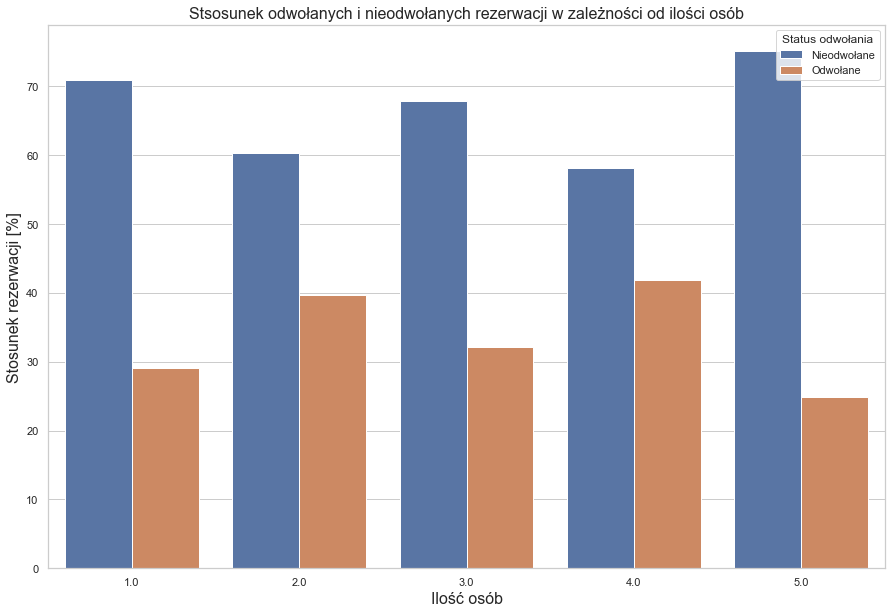

In [5]:
from IPython.display import Image
Image("wykres_2.png", width=700)

<AxesSubplot:>

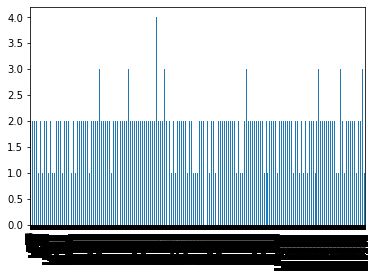

In [26]:
tabela_wiek = tabela_glowna[['is_canceled', 'adults', 'children', 'babies']].fillna(0.0)
tabela_wiek
tabela_wiek.isna().any()

#ogółem
# tabela_wiek.groupby(by=['is_canceled', 'adults', 'children', 'babies']).count()
# odwolane
# tabela_wiek['is_canceled'].value_counts()[1]
# tabela_wiek[tabela_wiek['is_canceled']==1]
# tabela_wiek[tabela_wiek['is_canceled']==1]['adults'].hist()
# plt.hist(tabela_wiek[tabela_wiek['is_canceled']==1]['adults'])
# tabela_wiek[tabela_wiek['is_canceled']==1]['children'].hist()
# tabela_wiek[tabela_wiek['is_canceled']==1]['babies'].hist()
# #nieodwolane
tabela_wiek['is_canceled'].value_counts()[0]
tabela_wiek[tabela_wiek['is_canceled']==0]
tabela_wiek[tabela_wiek['is_canceled']==0]['adults'].plot.bar(y=tabela_wiek['is_canceled'].value_counts()[0])
# tabela_wiek[tabela_wiek['is_canceled']==0]['children'].hist()
# tabela_wiek[tabela_wiek['is_canceled']==0]['babies'].hist()